# Spring 2019 Statistical NLP, UCSD
Programming Assignment 1: Language Modeling<br>


In [33]:
import numpy as np
from math import log
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import data as datainterface
from generator import Sampler
import random
import timeit
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
dnames = ["brown", "reuters", "gutenberg"]
datas = {}
models = {}
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts("data/corpora_.tar.gz", dname)
    datas[dname] = data
    model = datainterface.learn_trigram(data,  0.001 ,False)
    models[dname] = model

-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
-----------------------
gutenberg
	dev: gutenberg/gutenberg.dev.txt
	train: gutenberg/gutenberg.train.txt
	test: gutenberg/gutenberg.test.txt
gutenberg  read. train: 68740 dev: 14729 test: 14826


### Initial perplexity before adaptation

#### Perplexity on brown corpus (same as training data)

In [18]:
print("\ttrain:", models['brown'].perplexity(datas['brown'].train, 0.005))

	train: 141.5991933643397


#### Perplexity on reuters data (trained on brown corpus)

In [19]:
print("\ttrain:", models['brown'].perplexity(datas['reuters'].train, 0.005))

	train: 293.7064109816219


### Take the most frequent top 5% trigrams/bigrams/unigrams from and add to the brown corpus model 

In [23]:
sorted_x = sorted(models['reuters'].model.items(), key=lambda kv: -kv[1])
len(sorted_x)

953603

In [20]:
brown_model = models['brown']

In [28]:
for i in range(0,50000):
    if sorted_x[i][0] not in brown_model.model:
        brown_model.model[sorted_x[i][0]] = sorted_x[i][1]

In [30]:
print("\ttrain:", brown_model.perplexity(datas['brown'].train, 0.005))

	train: 141.5991933643397


In [29]:
print("\ttrain:", brown_model.perplexity(datas['reuters'].train, 0.005))

	train: 193.8937478834268


### take 10% of the vocabulary and add to train data

In [32]:
for i in range(0,100000):
    if sorted_x[i][0] not in brown_model.model:
        brown_model.model[sorted_x[i][0]] = sorted_x[i][1]

In [33]:
print("\ttrain:", brown_model.perplexity(datas['reuters'].train, 0.005))

	train: 176.07574717735216


### take 20% of the vocabulary and add to train data

In [35]:
for i in range(0,200000):
    if sorted_x[i][0] not in brown_model.model:
        brown_model.model[sorted_x[i][0]] = sorted_x[i][1]

In [36]:
print("\ttrain:", brown_model.perplexity(datas['reuters'].train, 0.005))

	train: 155.19307111579198


### take 40% of the vocabulary and add to train data

In [37]:
for i in range(0,400000):
    if sorted_x[i][0] not in brown_model.model:
        brown_model.model[sorted_x[i][0]] = sorted_x[i][1]

print("\ttrain:", brown_model.perplexity(datas['reuters'].train, 0.005))

	train: 138.16952467997163


### Perplexity on the data trained on Reuters corpus itself

In [34]:
print("\ttrain:", models['reuters'].perplexity(datas['reuters'].train, 0.005))

	train: 69.92837194230822


## Plots for hyperparamters tuning

In [21]:
import pandas as pd
import math

In [3]:
df = pd.read_csv('tuning_hyp.csv')

In [32]:
df

,dataset,perplexity,alpha,log_alpha
0,brown_train,7.998141,0.0001,-9.210340
1,brown_dev,14.143492,0.0001,-9.210340
2,brown_test,14.792639,0.0001,-9.210340
3,reuters_train,7.030132,0.0001,-9.210340
4,reuters_dev,10.810504,0.0001,-9.210340
5,reuters_test,11.134864,0.0001,-9.210340
6,gutenberg_train,10.551543,0.0001,-9.210340
7,gutenberg_dev,16.627832,0.0001,-9.210340
8,gutenberg_test,17.022804,0.0001,-9.210340
9,brown_train,30.939805,0.0010,-6.907755


In [22]:
df['log_alpha'] = df['alpha'].apply(lambda x: math.log(x))

In [24]:
df_brown_train = df.iloc[::9, :]
df_brown_train

,dataset,perplexity,alpha,log_alpha
0,brown_train,7.998141,0.0001,-9.210340
9,brown_train,30.939805,0.0010,-6.907755
18,brown_train,106.111425,0.0050,-5.298317
27,brown_train,189.091522,0.0100,-4.605170
36,brown_train,1467.987823,0.1000,-2.302585
45,brown_train,2797.972136,0.2000,-1.609438
54,brown_train,6664.735219,0.5000,-0.693147
63,brown_train,11730.362350,0.9000,-0.105361
72,brown_train,12990.151450,1.0000,0.000000


In [28]:
df_brown_dev = df.iloc[1::9, :]
df_brown_dev

,dataset,perplexity,alpha,log_alpha
1,brown_dev,14.143492,0.0001,-9.210340
10,brown_dev,58.378312,0.0010,-6.907755
19,brown_dev,199.200852,0.0050,-5.298317
28,brown_dev,353.554340,0.0100,-4.605170
37,brown_dev,2722.976882,0.1000,-2.302585
46,brown_dev,5187.259577,0.2000,-1.609438
55,brown_dev,12356.420830,0.5000,-0.693147
64,brown_dev,21753.690360,0.9000,-0.105361
73,brown_dev,24091.260300,1.0000,0.000000


In [30]:
df_brown_test = df.iloc[2::9, :]
df_brown_test

,dataset,perplexity,alpha,log_alpha
2,brown_test,14.792639,0.0001,-9.210340
11,brown_test,61.926183,0.0010,-6.907755
20,brown_test,212.661568,0.0050,-5.298317
29,brown_test,378.176355,0.0100,-4.605170
38,brown_test,2924.731385,0.1000,-2.302585
47,brown_test,5576.345177,0.2000,-1.609438
56,brown_test,13297.458820,0.5000,-0.693147
65,brown_test,23426.198120,0.9000,-0.105361
74,brown_test,25946.514980,1.0000,0.000000


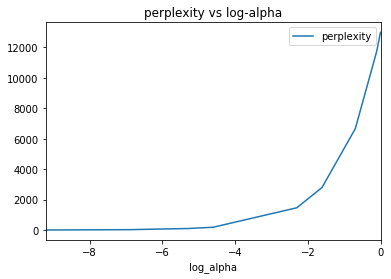

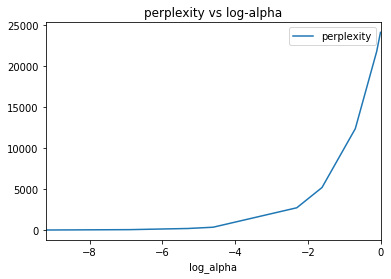

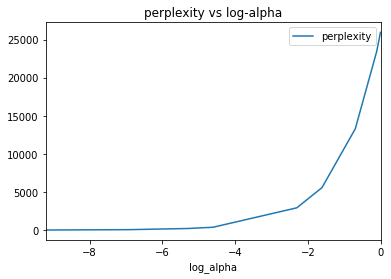

In [31]:
df_brown_train.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')
df_brown_dev.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')
df_brown_test.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')